***Taller #3 David Báez y Andrés Ramirez***


1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022:

A)Estimar los parámetros del modelo de mercado de las cinco acciones y construir un
DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades,
betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

In [ ]:
#Antes de iniciar con el desarrollo del taller se importarán las librerias necesarias para el desarrollo del mismo. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
import cvxpy as cp
from scipy.stats import norm
!pip install --quiet pyDOE
from pyDOE import lhs

  Preparing metadata (setup.py) ... done


In [ ]:
# Activos Seleccionados, junto con el cálculo de sus respectivos precios y retornos.
activos1 = 'V', 'KO', 'MSFT', 'WMT', 'BA'
fechai = '2015-12-01'
fechac = '2022-12-31'
periodo = '1mo'

precios1 = yf.download(activos1, fechai,fechac, interval=periodo)['Adj Close']
retornos1 = np.log(precios1/precios1.shift()).dropna()

[*********************100%***********************]  5 of 5 completed


In [ ]:
# Índice DJ
pindex1 = yf.download('^DJI',fechai, fechac, interval=periodo)['Adj Close']
rindex1 = np.log(pindex1/pindex1.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Información de cada activo por separado - (Precios, Retornos y datos Index)

In [ ]:
#Activo 1 
A_1 = 'V'
P_1 = yf.download(A_1, fechai, fechac, interval=periodo)['Adj Close']
R_1 = np.log(P_1/P_1.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Activo 2
A_2 = 'KO'
P_2 = yf.download(A_2, fechai, fechac, interval=periodo)['Adj Close']
R_2 = np.log(P_2/P_2.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Activo 3
A_3 = 'MSFT'
P_3 = yf.download(A_3, fechai, fechac, interval=periodo)['Adj Close']
R_3 = np.log(P_3/P_3.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Activo 4
A_4 = 'WMT'
P_4 = yf.download(A_4, fechai, fechac, interval=periodo)['Adj Close']
R_4 = np.log(P_4/P_4.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Activo 5
A_5 = 'BA'
P_5 = yf.download(A_5, fechai, fechac, interval=periodo)['Adj Close']
R_5 = np.log(P_5/P_5.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Extracción de resultados con cada activo.
X = pd.concat([R_1], axis = 1)
Y = rindex1
X = sm.add_constant(X)
m1 = sm.OLS(Y, X).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     99.66
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.07e-16
Time:                        00:07:50   Log-Likelihood:                 170.94
No. Observations:                  84   AIC:                            -337.9
Df Residuals:                      82   BIC:                            -333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.004      0.146      0.8

In [ ]:
X = pd.concat([R_2], axis = 1)
Y = rindex1
X = sm.add_constant(X)
m2 = sm.OLS(Y, X).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     49.35
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.74e-10
Time:                        00:07:59   Log-Likelihood:                 157.32
No. Observations:                  84   AIC:                            -310.6
Df Residuals:                      82   BIC:                            -305.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.004      0.822      0.4

In [ ]:
X = pd.concat([R_3], axis = 1)
Y = rindex1
X = sm.add_constant(X)
m3 = sm.OLS(Y, X).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     60.25
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.06e-11
Time:                        00:08:01   Log-Likelihood:                 160.67
No. Observations:                  84   AIC:                            -317.3
Df Residuals:                      82   BIC:                            -312.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.004     -0.561      0.5

In [ ]:
X = pd.concat([R_4], axis = 1)
Y = rindex1
X = sm.add_constant(X)
m4 = sm.OLS(Y, X).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     22.07
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.05e-05
Time:                        00:08:07   Log-Likelihood:                 147.54
No. Observations:                  84   AIC:                            -291.1
Df Residuals:                      82   BIC:                            -286.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.005      0.629      0.5

In [ ]:
X = pd.concat([R_5], axis = 1)
Y = rindex1
X = sm.add_constant(X)
m5 = sm.OLS(Y, X).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     69.28
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.59e-12
Time:                        00:08:10   Log-Likelihood:                 163.25
No. Observations:                  84   AIC:                            -322.5
Df Residuals:                      82   BIC:                            -317.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.004      1.694      0.0

In [ ]:
# Variables A1
x = rindex1
y = R_1
t = len(x)
ones = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
ones.index = x.index
va = pd.concat([ones,x], axis=1)
X = va.T @ va
Xy = va.T @ y
Sol1= np.linalg.solve(X,Xy)

In [ ]:
# Variables A2
x = rindex1
y = R_2
t = len(x)
ones = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
ones.index = x.index
va = pd.concat([ones,x], axis=1)
X = va.T @ va
Xy = va.T @ y
Sol2= np.linalg.solve(X,Xy)

In [ ]:
# Variables A3
x = rindex1
y = R_3
t = len(x)
ones = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
ones.index = x.index
va = pd.concat([ones,x], axis=1)
X = va.T @ va
Xy = va.T @ y
Sol3= np.linalg.solve(X,Xy)

In [ ]:
# Variables A4
x = rindex1
y = R_4
t = len(x)
ones = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
ones.index = x.index
va = pd.concat([ones,x], axis=1)
X = va.T @ va
Xy = va.T @ y
Sol4= np.linalg.solve(X,Xy)

In [ ]:
# Variables A5
x = rindex1
y = R_5
t = len(x)
ones = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
ones.index = x.index
va = pd.concat([ones,x], axis=1)
X = va.T @ va
Xy = va.T @ y
Sol5= np.linalg.solve(X,Xy)

In [ ]:
# Beta, Alpha y Sigma por activo.
#Activo 1
ByA_1 = Sol1.T
Be1 = ByA_1[:,0].tolist()
Alp1 = ByA_1[:,1].tolist()
Sig1 = np.sqrt(R_1.var())

In [ ]:
#Activo 2
ByA_2 = Sol2.T
Be2 = ByA_2[:,0].tolist()
Alp2 = ByA_2[:,1].tolist()
Sig2 = np.sqrt(R_2.var())

In [ ]:
#Activo 3
ByA_3 = Sol3.T
Be3 = ByA_3[:,0].tolist()
Alp3 = ByA_3[:,1].tolist()
Sig3 = np.sqrt(R_3.var())

In [ ]:
#Activo 4
ByA_4 = Sol4.T
Be4 = ByA_4[:,0].tolist()
Alp4 = ByA_4[:,1].tolist()
Sig4 = np.sqrt(R_4.var())

In [ ]:
#Activo 5
ByA_5 = Sol5.T
Be5 = ByA_5[:,0].tolist()
Alp5 = ByA_5[:,1].tolist()
Sig5 = np.sqrt(R_5.var())

In [ ]:
#Creación del DataFrame para el Beta, Sigma y Alpha
Be11 = pd.DataFrame([Be1, Be2, Be3, Be4, Be5], index = activos1, columns = ['Betas'])
Alp11 = pd.DataFrame([Alp1, Alp2, Alp3, Alp4, Alp5], index = activos1, columns = ['Interceptos'])
Sig11 = pd.DataFrame([Sig1, Sig2, Sig3, Sig4, Sig5], index = activos1, columns = ['Volatilidades'])

In [ ]:
#Cálculo de la Media del índice DJ
MI= rindex1.mean()
MI

0.007655382368731445

In [ ]:
#Cálculo de los Coeficientes de Determinación por Activo. 
#Activo 1
Coef_1 = m1.rsquared
#Activo 2
Coef_2 = m2.rsquared
#Activo 3
Coef_3= m3.rsquared
#Activo 4
Coef_4= m4.rsquared
#Activo 5
Coef_5= m5.rsquared

In [ ]:
#DataFrame con el cálculo de los retornos esperados y estimados por CAPM, junto con los coeficientes calculados anteriormente.
#DataFrame Retornos Esperados (RE) 
RE= pd.DataFrame([R_1.mean(),R_2.mean(),R_3.mean(),R_4.mean(),R_5.mean()], index = activos1, columns=['Retornos Esperados'])
#DataFrame Retornos Estimados CAPM (RE CAPM)
REE= pd.DataFrame([Be1[0]*rindex1.mean(), Be2[0]*rindex1.mean(), Be3[0]*rindex1.mean(), Be4[0]*rindex1.mean(), Be5[0]*rindex1.mean()], index = activos1, columns = ['RE CAPM'])
#DataFrame Coeficientes de Determinación (Coef D)
Coef = pd.DataFrame([Coef_1, Coef_2, Coef_3, Coef_4, Coef_5], index = activos1, columns = ['Coef D']) 

In [ ]:
#Tabla Final con los DataFrame requeridos en el punto. 
DataF = pd.concat([RE, Alp11, Sig11, Be11, REE, Coef], axis = 1)
DataF

,Retornos Esperados,Interceptos,Volatilidades,Betas,RE CAPM,Coef D
V,0.012297,0.945636,0.060453,0.005058,0.000039,0.548601
KO,0.007340,0.649686,0.050187,0.002367,0.000018,0.375721
MSFT,0.018727,0.794650,0.057814,0.012644,0.000097,0.423569
WMT,0.011771,0.532887,0.054794,0.007691,0.000059,0.212055
BA,0.004578,1.794693,0.125571,-0.009161,-0.000070,0.457974


B). Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del
CAPM y las betas de los activos.

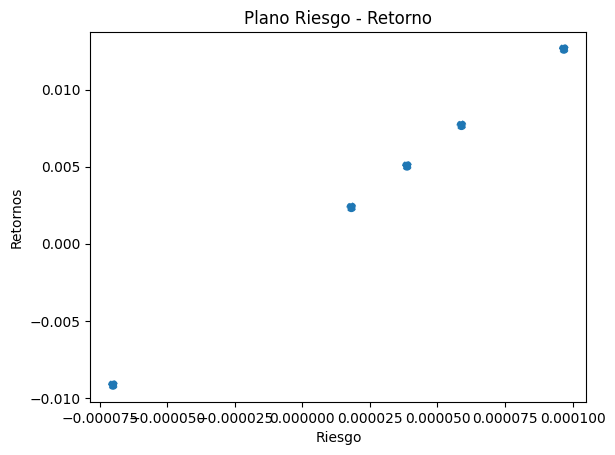

In [ ]:
fi,ax=plt.subplots();
ax.scatter(REE, Be11, ls='--',marker='o')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retornos')
ax.set_title('Plano Riesgo - Retorno')
plt.show()

2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:
tomar solo posiciones largas en el portafolio.

In [ ]:
# Activos Seleccionados, junto con el cálculo de sus respectivos precios y retornos.
activos2 = 'NKE', 'MCD', 'INTC', 'T', 'CAT'
fechai2 = '2014-12-01'
fechac2 = '2022-12-31'
periodo2 = '1mo'
precios2 = yf.download(activos2, fechai2,fechac2, interval=periodo2)['Adj Close']
retornos2 = np.log(precios2/precios2.shift()).dropna()

[*********************100%***********************]  5 of 5 completed


In [ ]:
# Índice DJ con la periodicidad establecida.
pindex2 = yf.download('^DJI',fechai2, fechac2, interval=periodo2)['Adj Close']
rindex2 = np.log(pindex2/pindex2.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Desarrollo Portafolio Tangente 
covt = retornos2.cov()
covt = np.array(covt)
vector_retornos= np.array(retornos2.mean())
ones2 = np.ones(5)
covtinv= np.linalg.inv(covt)
vector_pesos = covtinv*ones2

In [ ]:
#Cálculo de los vectores que cumplan con la restricción establecida por el modelo de Sharpe.
n = len(vector_retornos)
x = cp.Variable(n)
obj= cp.Minimize(cp.quad_form(x, covt))
rest= [x @ vector_retornos == 1, x @ vector_retornos >= 0]
prob = cp.Problem(obj, rest)
prob.solve()
Sharper= x.value/sum(x.value)
vector_pesos_2 = round(pd.DataFrame(Sharper).T,4)

Text(0.5, 1.0, 'Portafolio de Sharpe, Plano Riesgo - Retorno')

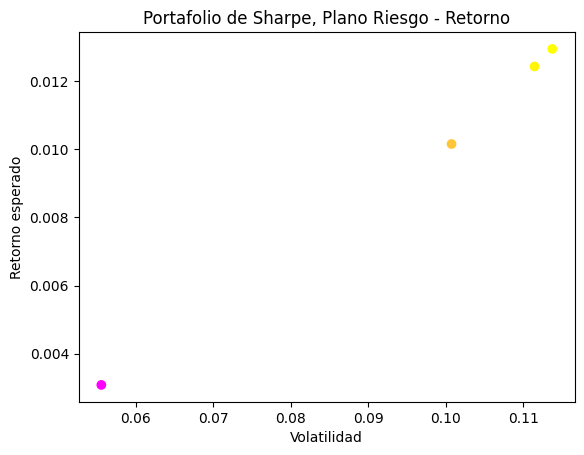

In [ ]:
plt.scatter(np.sqrt(vector_retornos), vector_retornos, c=vector_retornos / np.sqrt(vector_retornos), marker='o', cmap='spring');
plt.xlabel('Volatilidad')
plt.ylabel('Retorno esperado')
plt.title('Portafolio de Sharpe, Plano Riesgo - Retorno')

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo estándar o paramétrico.

In [ ]:
# Cálculo Var para un Nivel de confianza del 95%
rp = (retornos2 @ Sharper).mean()
sigma1_1 = (retornos2 @ Sharper).std()
alpha1 = 0.05
VaR1= rp - norm.ppf(1-alpha1)*sigma1_1 
VaR1

-0.09013040879493832

In [ ]:
# Cálculo Var para un Nivel de confianza del 95%
alpha2 = 0.01
VaR2= rp - norm.ppf(1-alpha2)*sigma1_1
VaR2

-0.13619940882577014

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo de estimación histórica.

In [ ]:
# Cálculo Var para un Nivel de confianza del 95% con el modelo de estimación histórica.
alpha1_2 = 0.05
est_h = retornos2[-5:] 
VaR3 = -np.percentile(est_h, 5)
VaR3

0.18998559218401975

In [ ]:
# Cálculo Var para un Nivel de confianza del 99% con el modelo de estimación histórica.
alpha = 0.01 
est_h_2 = retornos2[-5:] 
VaR4 = -np.percentile(est_h_2, 1)
VaR4

0.23697082205027856

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000
portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

In [ ]:
NS = 10000 #Número de portafolios establecidos por el enunciado
simulacionp = np.random.dirichlet(np.ones(len(retornos2.columns)), NS)
simulacionr = np.dot(retornos2, simulacionp.T)
simulacionv = np.sqrt(np.diag(np.dot(np.dot(simulacionp, covt), simulacionp.T)))
alpha = 0.95
MonteCarloVaR = np.percentile(-simulacionr, alpha*100)
MonteCarloVaR

0.08233518769253209

¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de
paramétrico?

######Sí, se puede observar que el VaR del método de Monte Carlo es inferior a los VaR paramétricos calculados anteriormente, ya que el primero es de 0.08, mientras que los demás arrojan 0.18 y 0.23 para una confianza del 95% y 99%, respectivamente.

3. Los precios de activos riesgos en el mercado describen un proceso estocástico {St
} t≥0 que satisface:

St = S0 exp{(μ– 1/2σ
2
)dt + σ dWt
} 

Donde: μ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de
Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de
tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.

In [ ]:
# Activo elegido NIKE, Ticker="NKE"
asset= 'NKE'
fechai3 = '2018-12-01'
fechac3 = '2022-12-31'
periodo3= '1mo'
precio_asset3 = yf.download(asset, fechai3, fechac3, periodo3)['Adj Close']
retornos_asset3 = np.log(precio_asset3/precio_asset3.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [180]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

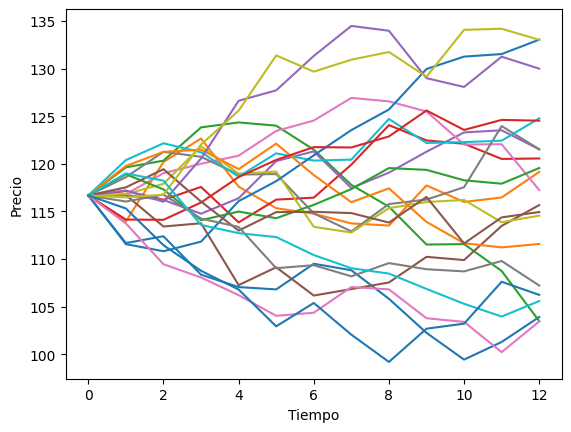

In [ ]:
mu = retornos_asset3.mean()*12
sigma = retornos_asset3.std()*np.sqrt(12)
T = 1
S0 = precio_asset3[-1]
NS = 10000
M = 12
SS = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(SS[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio');

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

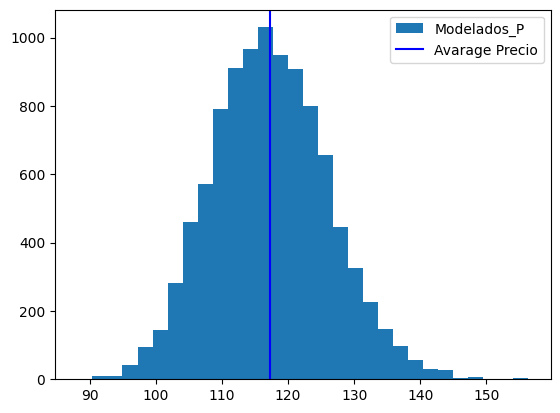

In [ ]:
plt.hist(SS[:,-1], bins=30, label='Modelados_P')
plt.axvline(SS[:,-1].mean(), color='blue', label='Avarage Precio')
plt.legend();

In [ ]:
S0

116.67731475830078

Al realizar una revisión de la gráfica se puede observar que hay un sesgo hacia la izquierda de la misma, lo cual indica la dirección de los retornos a un precio promedio de 116.68. 

C. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [109]:
S0 * np.exp(mu * T) 

117.28550426818684

In [110]:
SS[:,-1].mean()  

117.39000670587141

R/: Al realizar una revisión de los precios, se puede observar la similitud en los resultados, en donde la diferencia entre uno y otro está dada por 0.11 de variación en el valor del precio.

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [111]:
P_3 = SS[:,-1]
len(P_3[P_3 < S0])/NS*100

48.17

In [ ]:
#La probabilidad de que el precio sea inferior a SO es de 48,17%. 

4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan
ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de
estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface:

    Xt+dt = Xt + (μ–Xt
)dt + σ(Wt+dt − Wt) 

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles
trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ =0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras
10 trayectorias del proceso.

In [121]:
#Datos 
X0=1
mu=3
sigma=0.3
T=5
ns=100
m=100
dt=T/m

In [119]:
#Parámetros para realizar la función 
def OrnsteinU(X0,mu,sigma,T,dt):
  N=round(T/dt)
  t=np.linspace=(0,T,N+1)
  X=np.zeros(N+1)
  X[0]= X0
  for i in range(N):
    dW=np.random.normal(0, np.sqrt(dt))
    X[i+1] = X[i] + (mu-X[i])*dt + sigma*dW
  return t, X 

In [129]:
trayect=[]
for i in range(ns):
  _, X=OrnsteinU(X0,mu,sigma,T,dt)
  trayect.append(X)

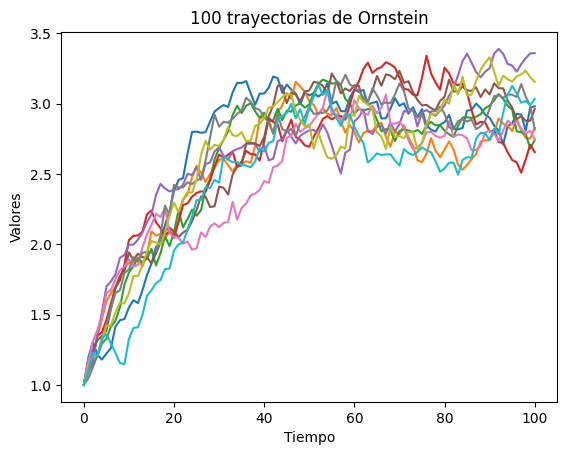

In [141]:
for i in range (10): 
  plt.plot(trayect[i])
plt.xlabel("Tiempo");
plt.ylabel('Valores');
plt.title("100 trayectorias de Ornstein");

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

In [ ]:
#Al observar los datos en el largo plazo con el proceso realizado se puede observar que la varianza se estabiliza  y frente al valor esperado, este aumenta con el tiempo.

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso
Ornstein-Uhlenbeck?

In [ ]:
#dW=np.random.normal(0, np.sqrt(dt)), la distribución de la probabilidad es normal y se agrega a la función random, el cual genera una variable aleatoria que se distribuye normalmente. 

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa
corta de interés.

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T =
1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante
T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con
vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del
proceso.

In [147]:
#Establecimiento de Parámetros para poder realizar el ejercicio 
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
ns = 100
dt = T/m

In [148]:
#Definición del ciclo 
def tasa_corta(r0, mu, sigma, T, ns, dt):
	t = np.arange(0, T+dt, dt)
	r = np.zeros((ns, len(t)))
	r[0] = r0
	for i in range(1, len(t)):
		dW = np.random.normal(0, np.sqrt(dt), size = ns)
		r[:,i-1] = r[:, i-1] + (mu-r[:,i-1]) * dt + sigma * dW
	rT = r[:, -1].mean()
	
	return rT

In [208]:
#Parametrización tasa corta
rT = tasa_corta(r0, mu, sigma, T, ns, dt)
print(rT*100)

0.03


In [ ]:
#La tasa corta es de 0.03

In [150]:
#Parametrización Bono
Bono = 100/(1+rT)**T
Bono

99.97000899730081

In [ ]:
#El valor del Bono es de 99,97

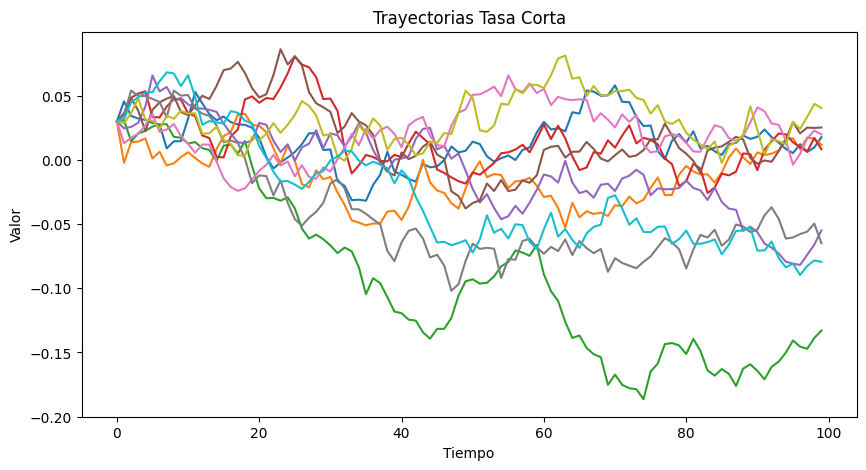

In [207]:
plt.figure(figsize=(10,5))
for i in range(10):
	r = np.zeros((ns, 1))
	r[0] = r0
	
	for j in range(1,ns):
		dW = np.random.normal(0,np.sqrt(dt))
		r[j] = r[j-1] + (mu-r[j-1]) * dt + sigma * dW

	plt.plot(r)
plt.title('Trayectorias Tasa Corta')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

5. Escoja tres de los siguientes activos.

i. Gold futures (GC=F)

ii. Brent Oil futures (BZ=F)

iii. US Treasury Bill (^IRX)

iv. EURUSD currency (EURUSD=X)

v. GBPUSD currency (GBPUSD=X)

vi. Coffee futures (KC=F)

vii. Natural gas (NG=F)

viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU.

La selección del proceso debe incorporar:

a. La gráfica de las series históricas de los precios

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Los resultados de la simulación

In [175]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [189]:
activos5 = ('HG=F', 'EURUSD=X', 'GBPUSD=X')
fechai5 = '2004-12-01'
fechac5 = '2022-12-31'
cost5 = yf.download(activos5, fechai5, fechac5, interval="1Mo")["Adj Close"]
retornos5 = np.log(cost5/cost5.shift()).dropna()

[*********************100%***********************]  3 of 3 completed


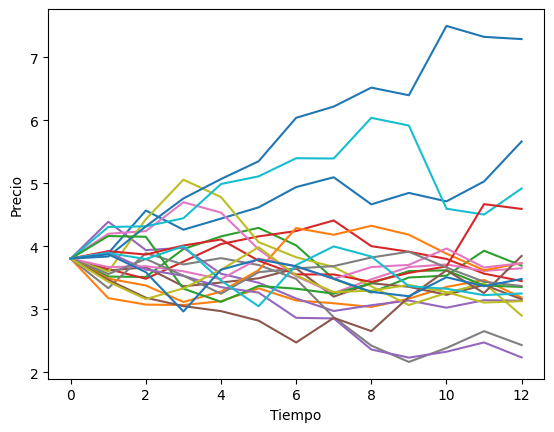

In [192]:
mu = retornos5['HG=F'].mean()*12
sigma = retornos5['HG=F'].std()*np.sqrt(12)
S0 = cost5['HG=F'][-1]
T = 1
NS = 100
M = 12
st1 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(st1[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio');

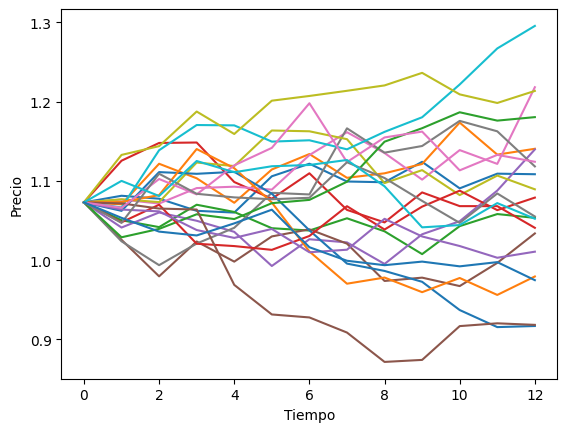

In [194]:
mu = retornos5['EURUSD=X'].mean()*12
sigma = retornos5['EURUSD=X'].std()*np.sqrt(12)
S0 = cost5['EURUSD=X'][-1]
T = 1
NS = 100
M = 12
st2 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(st2[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio');

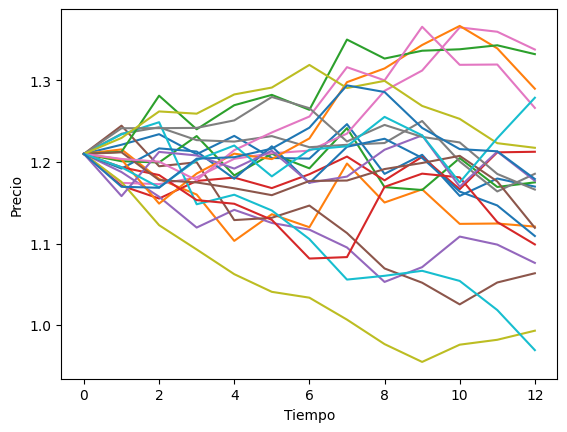

In [195]:
mu = retornos5['GBPUSD=X'].mean()*12
sigma = retornos5['GBPUSD=X'].std()*np.sqrt(12)
T = 1
S0 = cost5['GBPUSD=X'][-1]
NS = 100
M = 12
st3 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(st3[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio');

In [198]:
dftest1 = adfuller(cost5['HG=F'])  
print("Dickey-Fuller test: %f" % dftest1[0])
print("P-value: %f" % dftest1[1])
print("Critical values:")
for key, value in dftest1[4].items():
  print("\t%s: %f" %(key,value))
  #Profe, este test no me corrió con ningún otro activo porque me arrojaba el mismo error de contener datos nulos en los históricos y no entendí por qué 

MissingDataError: ignored

In [196]:
dftest2 = adfuller(cost5['EURUSD=X'])  
print("Dickey-Fuller test: %f" % dftest2[0])
print("P-value: %f" % dftest2[1])
print("Critical values:")
for key, value in dftest2[4].items():
  print("\t%s: %f" %(key,value))


Dickey-Fuller test: -1.825029
P-value: 0.368108
Critical values:
	1%: -3.460992
	5%: -2.875016
	10%: -2.573952


In [ ]:
#Al tener un nivel de confianza establecido del 99% y ver que el valor P es superior al 1%, se puede concluir que es No Estacionaria 

In [197]:
dftest3 = adfuller(cost5['GBPUSD=X'])  
print("Dickey-Fuller test: %f" % dftest3[0])
print("P-value: %f" % dftest3[1])
print("Critical values:")
for key, value in dftest3[4].items():
  print("\t%s: %f" %(key,value))

Dickey-Fuller test: -1.749889
P-value: 0.405609
Critical values:
	1%: -3.461429
	5%: -2.875207
	10%: -2.574054


In [ ]:
#Al tener un nivel de confianza establecido del 99% y ver que el valor P es superior al 1%, se puede concluir que es No Estacionaria 

c. Los resultados de la simulación

In [ ]:
#A continuación se presentan los resultados de la simulación por cada activo seleccionado. 

In [206]:
#Asset 1
st1[:,-1].mean()

3.777664179076763

In [204]:
#Asset 2
st2[:,-1].mean()

1.0713917302614677

In [205]:
#Asset 3
st3[:,-1].mean()

1.1648138512712047